In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline

# Scikit-Learn introduction

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


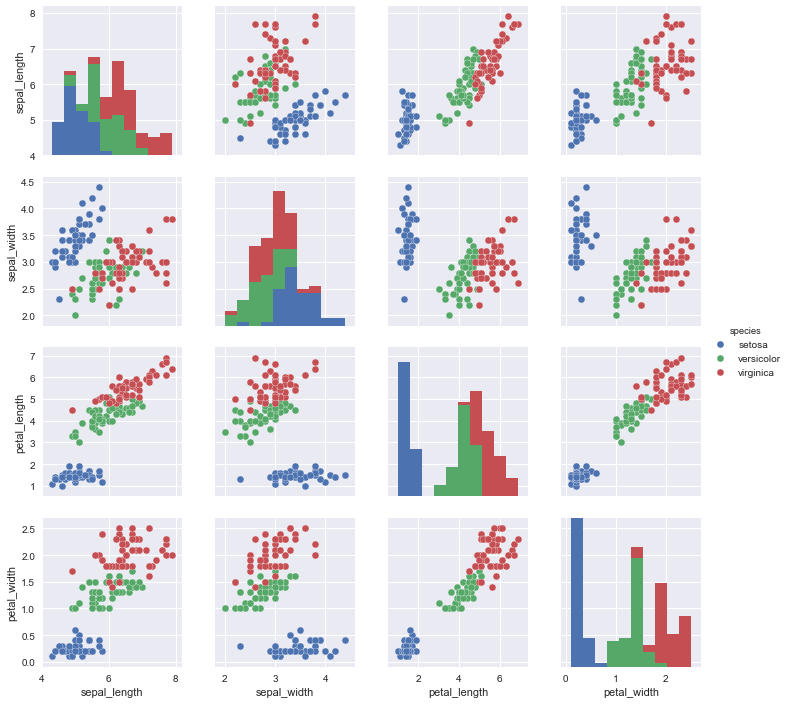

In [6]:
sns.pairplot(iris,hue='species',size=2.5);

In [7]:
#Features Matrix
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [8]:
# Labels
y_iris = iris['species']
y_iris.shape

(150,)

### Supervised Learning

In [10]:
# Separate data into training and testing
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, 
                                                random_state=1)
# Machine Learning Process:
from sklearn.naive_bayes import GaussianNB #1. Choose model 
model = GaussianNB()                       #2. instantiate model
model.fit(Xtrain, ytrain)                  #3. Fit model
y_model = model.predict(Xtest)             #4. predict on new data

#Validate accurancy of the model
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

### Unsupervised Learning

#### Dimensionality reduction

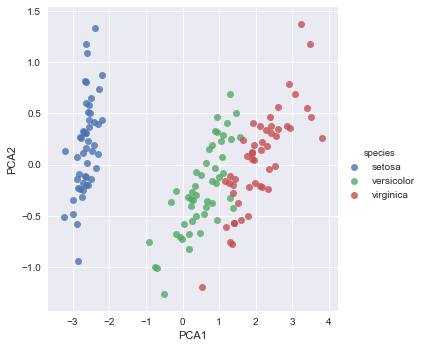

In [23]:
#Unsupervised Learning Process:
from sklearn.decomposition import PCA #1. Choose model
model = PCA(n_components=2)           #2. Instantiate model
model.fit(X_iris)                     #3. Fit model
X_2D = model.transform(X_iris)        #4. Transform data to 2 dimensions

#Visualize results
iris['PCA1'] = X_2D[:,0]
iris['PCA2'] = X_2D[:,1]
sns.lmplot("PCA1", "PCA2", iris, hue='species', fit_reg=False);

#### Clustering

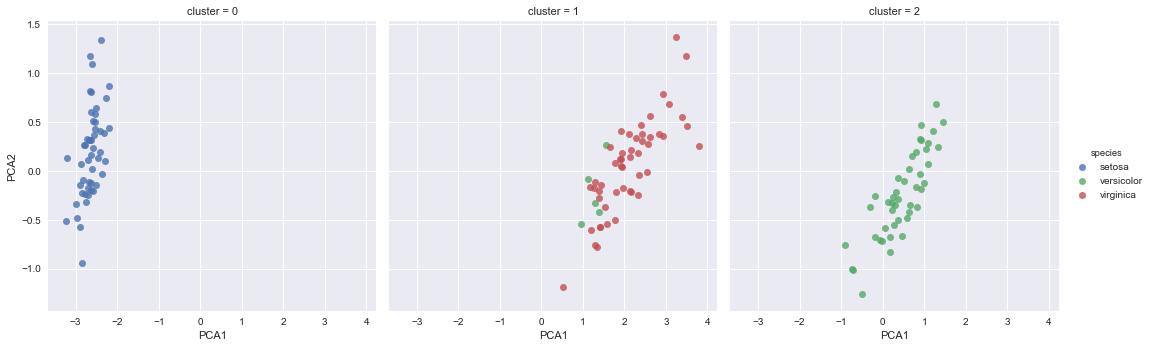

In [25]:
from sklearn.mixture import GaussianMixture as GMM  #1. Choose the model class
model = GMM(n_components=3, covariance_type='full') #2. Instantiate model
model.fit(X_iris)                               #3. Fit to data
y_gmm = model.predict(X_iris)                   #4. Determine labels

#Plot results
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", iris, hue='species', 
           col='cluster', fit_reg=False);

### Exploring Handwritten Digits

In [26]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

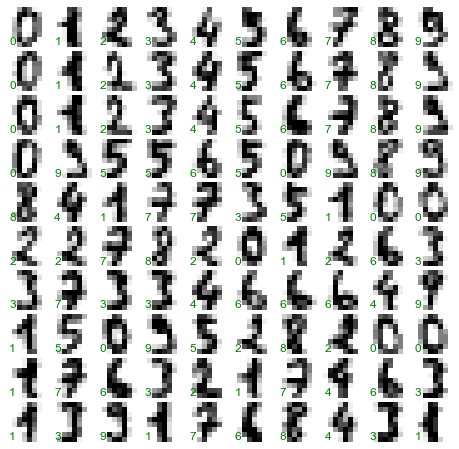

In [27]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [28]:
X = digits.data
X.shape

(1797, 64)

In [29]:
y = digits.target
y.shape

(1797,)

In [30]:
# Dimensionality reduction
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

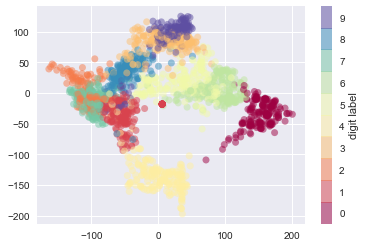

In [37]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

In [38]:
#Classification

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=0)
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

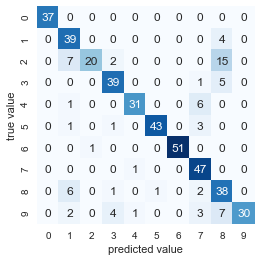

In [42]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest,y_model)
sns.heatmap(mat,square=True,annot=True,cbar=False,cmap='Blues')
plt.xlabel('predicted value')
plt.ylabel('true value');

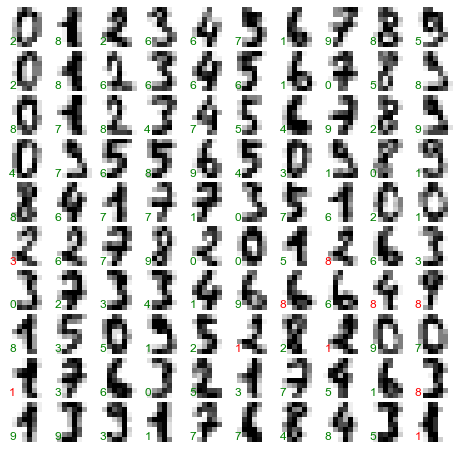

In [43]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')